# Bài thực hành 4
### Môn: Linear Algebra

In [1]:
import numpy as np
from scipy import linalg
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
v1 = np.array([0, 2, -1])
v2 = np.array([2, 2, 0])
v3 = np.array([6, 16, -5])

A = np.vstack([v1, v2]).T
print(A)



[[ 0  2]
 [ 2  2]
 [-1  0]]


In [8]:
from scipy import linalg

lu,piv = linalg.lu_factor(A)
linalg.lu_solve((lu,piv),v3)

C:\Users\baotg2\AppData\Local\Temp\ipykernel_21532\2008512070.py:3: LinAlgWarning: Diagonal number 3 is exactly zero. Singular matrix.
  lu,piv = linalg.lu_factor(A)


array([nan, nan, nan])

In [16]:
print(np.linalg.matrix_rank(A))
A_mr = np.hstack([A, v3.reshape(-1,1)])
rA = np.linalg.matrix_rank(A)
rAm = np.linalg.matrix_rank(A_mr)
if rA == rAm and rA ==2:
    print("Hệ phương trình có nghiệm duy nhất")
    print(np.linalg.lstsq(A,v3,rcond=None)[0])

2
Hệ phương trình có nghiệm duy nhất
[5. 3.]


In [17]:
#  Kiểm tra tính độc lập ha phụ thuộc tuyến tính
v1 = np.array([1,2,-3,4])
v2 = np.array([1,1,0,2])
v3 = np.array([-1,-2,1,1])

A = np.vstack([v1,v2,v3]).T

print(A)

[[ 1  1 -1]
 [ 2  1 -2]
 [-3  0  1]
 [ 4  2  1]]


In [18]:
rA = np.linalg.matrix_rank(A)

if rA == 3: 
    print("Hệ vecto độc lập tuyến tính")
else: 
    print("Hệ vecto phụ thuộc tuyến tính")

Hệ vecto độc lập tuyến tính


In [26]:
# tìm cơ sở của không gian vector cho trước 
v1 = np.array([1,2,-1,-1])
v2 = np.array([2,-1,1,2])
v3 = np.array([3,-4,3,5])
v4 = np.array([-1,8,-5,-6])

A = np.vstack([v1,v2,v3,v4]).T

In [28]:
from scipy import linalg

lu = linalg.lu(A)
lu(-1)

TypeError: 'tuple' object is not callable

### Bài tập 1
Cho hai không gian $U_1$ và $U_2$, trong đó $U_1$ được sinh bởi các cột của ma trận ${\bf A}_1$, $U_2$ được sinh bởi các cột của ma trận ${\bf A}_2$ với

$${\bf A}_1=\left[\begin{matrix}
1 & 0 & 1\\
1 & -2 & -1\\
2 & 1 & 3\\
1 & 0 & 1
\end{matrix}\right],\ 
{\bf A}_2=\left[\begin{matrix}
3 & -3 & 0\\
1 & 2 & 3\\
7 & -5 & 2\\
3 & -1 & 2
\end{matrix}\right]$$

Xác định một cơ sở và số chiều của các không gian véc tơ sau đây:
* $U_1$, $U_2$.
* $U_3=U_1+U_2=\{x=x_1+x_2\,:\,x_1\in U_1,\,x_2\in U_2\}$.
* $U_4=U_1\cap U_2=\{x\,:\,x\in U_1,\,x\in U_2\}$.

In [29]:
# tìm ma trận chuyển tọa độ từ B sang C

b1 = np.array([-9,1])
b2 = np.array([-5,-1])
c1 = np.array([1,-4])
c2 = np.array([3,-5])

B = np.vstack([b1,b2]).T
C = np.vstack([c1,c2]).T
print("ma trận chuyển tọa độ P = ", np.linalg.inv(C)@B)

ma trận chuyển tọa độ P =  [[ 6.  4.]
 [-5. -3.]]


In [30]:
data = np.loadtxt("polyfit-data.csv", delimiter=",")

print(data)

[[-1.    -6.375]
 [-0.444 -2.211]
 [ 0.111  4.491]
 [ 0.667  0.146]
 [ 1.222  2.987]
 [ 1.778  2.545]
 [ 2.333  0.05 ]
 [ 2.889  4.134]
 [ 3.444 13.312]
 [ 4.    26.058]]


In [31]:
x = data[:,0]
y = data[:,1]

X = np.vstack([np.ones(len(x)), x, x**2, x**3]).T
b = np.linalg.lstsq(X,y, rcond=None)[0]
print("Các hệ số trong mô hình:", b)

Các hệ số trong mô hình: [ 2.10197554  3.27292648 -4.60377845  1.32026397]


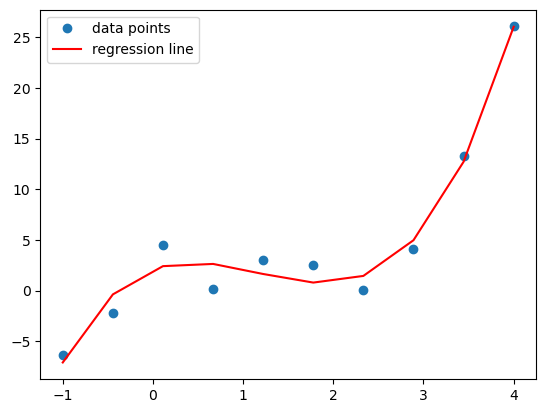

In [32]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o',label='data points')
y_predict = b[0] + b[1]*x + b[2]*x**2 + b[3]*x**3 
plt.plot(x, y_predict, '-r', label = "regression line")
plt.legend()

In [34]:
data = np.loadtxt("michalis-menten.csv", delimiter=",")
x = data[:,0]
y = data[:,1]
f = lambda x, a, b: a*x/(b+x)
p0 = [1,1] #giá trị xuất phát của a và b

from scipy.optimize import curve_fit

p = curve_fit(f, x, y, p0)[0]
print("Các hệ số của mô hình", p)


Các hệ số của mô hình [2.12683655e+02 6.41211439e-02]


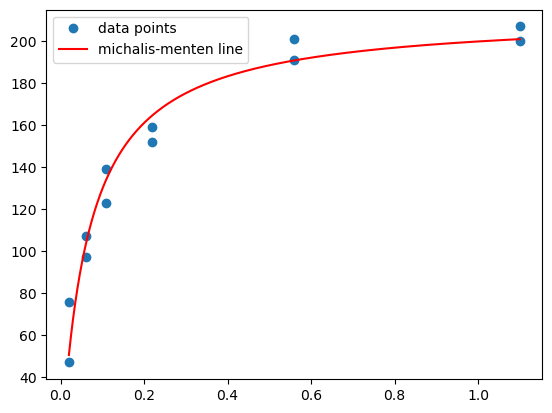

In [36]:
plt.plot(x,y,'o',label='data points')
X = np.linspace(x.min(), x.max(),5000)
plt.plot(X, f(X,p[0],p[1]), '-r', label = "michalis-menten line")
plt.legend()

### Bài tập 2
Cho các đa thức: 
$${\bf p}_1(x)=1+x,\,{\bf p}_2(x)=1-x,\,{\bf p}_3(x)=4$$
$${\bf p}_4(x)=1+x^2,\,{\bf p}_5(x)=1+2x+x^2$$

Gọi $H$ là không gian con của $\mathbb{P}_5$ sinh bởi tập $S=\{{\bf p}_1,{\bf p}_2,{\bf p}_3,{\bf p}_4,{\bf p}_5\}$.

* Hãy tìm một cơ sở và số chiều của $H$.
* Tìm tọa độ của ${\bf q}=3-2x+x^2\in H$ theo cơ sở tìm được.

### Bài 3
Trong xử lý tín hiệu số, phương trình sai phân cấp $n$:

$$y_{k+3}-2y_{k+2}+9y_{k+1}-18y_k=z_k$$

mô tả một bộ lọc tuyến tính với $\{y_k\}$ là tín hiệu vào và $\{z_k\}$ là tín hiệu ra. Trường hợp $z_k=0$ phương trình được gọi là thuần nhất. Tập tín hiệu vào $\{y_k\}$ thoả mãn phương trình thuần nhất là một không gian véc tơ 3 chiều $H$. Xét tập tín hiệu 

$$(\mathcal{B})=\left\{2^k,\,3^k\sin\left(\frac{k\pi}{2}\right),\,3^k\cos\left(\frac{k\pi}{2}\right)\right\}$$

* Chứng minh $(\mathcal{B})$ gồm các nghiệm của phương trình thuần nhất.
* Chứng minh $(\mathcal{B})$ là một cơ sở của $H$.